This code was inspired by [this example](https://www.linkedin.com/posts/hanane-d-algo-trader_react-financial-agent-llamaindex-activity-7186333474256035840-jyQV/?utm_source=share&utm_medium=member_desktop)

I modified it with the intention of trying new ideas and improving it for my own needs.

Notice that I am assuming you have the relevant API_KEYs as environmental variables.

To create the NEWS_API_KEY you can go [HERE](https://newsapi.org/docs/get-started)

In [5]:
%pip install newsapi-python
%pip install yfinance

In [3]:
from bubls.utils.agents.finance_tools import FinanceTools
from llama_index.llms.openai import OpenAI
from llama_index.agent.openai import OpenAIAgent
from llama_index.core.prompts.system import SHAKESPEARE_WRITING_ASSISTANT
from newsapi import NewsApiClient
import os

## Loading tools from defined class

In [2]:
news_api_client = NewsApiClient(os.environ["NEWS_API_KEY"])
finance_tool = FinanceTools(news_api_client)
finance_tools_list = finance_tool.to_tool_list()

for tool in finance_tools_list:
    print("name:", tool.metadata.name)
    print("return_direct:", tool.metadata.return_direct)
    print("description:", tool.metadata.description.split("Args:")[0])

##  Agent

In [8]:
llm = OpenAI("gpt-4")
agent = OpenAIAgent.from_tools(
    finance_tools_list,
    llm=llm,
    verbose=False,
    system_prompt=SHAKESPEARE_WRITING_ASSISTANT,
)

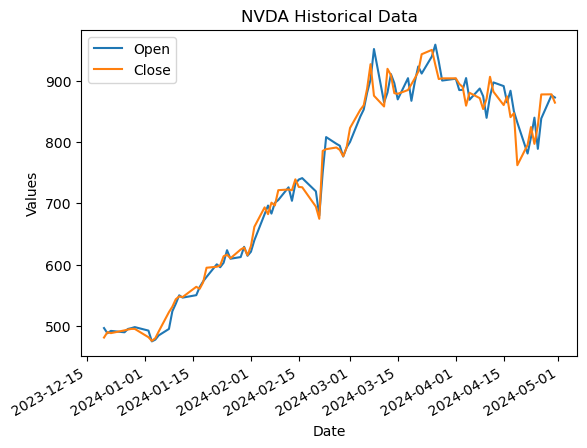

Verily, the market hath opened and closed for Nvidia in the past two days as follows:

On the 29th day of April, in the year of our Lord 2024, the market didst open at a price of 875.95. The highest price reached was 879.92, whilst the lowest was 852.66. The market didst close at a price of 877.57, with a volume of 38,897,100.

On the 30th day of April, in the year of our Lord 2024, the market didst open at a price of 872.40. The highest price reached was 888.19, whilst the lowest was 863.00. The market didst close at a price of 864.02, with a volume of 36,055,200.

No dividends were given, nor were there any stock splits on these days.


In [9]:
response = agent.chat(
    """Plot the open and close prices of Nvidia for the last 3 months.
    Also give me information of the last 2 days.
    """
)
print(response)

In [7]:
response = agent.chat(
    "Tell me a story about Nvidia's news during the last month?"
)
print(response)

In the realm of technology, where silicon giants roam, there exists a titan known as Nvidia. In the past moon, tales of its deeds have echoed across the land, and I, your humble bard, am here to recount them.

Firstly, the heralds proclaimed, "NVDA Portable 2024.1 (screen reader) Released". A new version of NVDA Portable, a swift and efficient screen reader, was released to the world. Packaged in PortableApps.com Format, it integrated seamlessly with the PortableApps.com Platform. This was a boon for those in need of such a tool, and it was met with much appreciation.

Then came the news, "NVIDIA Had Buy Signals In Oct 2022 And Jan 2023. Significant Gains Ended With A Downside ‘Key Reversal’ On March 8, 2024". Nvidia, it seemed, had been a favourable choice for investors, with buy signals appearing in October 2022 and January 2023. However, the gains ended with a downside 'Key Reversal' on March 8, 2024. This was a twist in the tale, adding a dash of intrigue to Nvidia's story.

Next, 